## Load Libraries and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid')
import sqlite3

In [2]:
df = pd.read_csv('shark_tank_data.csv')

In [3]:
df.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Business Description,Pitchers Gender,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Kevin Harrington Present,Guest Name,Notes
0,1,09-Aug-09,05-Feb-10,1,1,09-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1,09-Aug-09,05-Feb-10,1,2,09-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN


## Data Exploration & Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1038 non-null   int64  
 1   Season Start                        1038 non-null   object 
 2   Season End                          1031 non-null   object 
 3   Episode Number                      1038 non-null   int64  
 4   Pitch Number                        1038 non-null   int64  
 5   Original Air Date                   630 non-null    object 
 6   Startup Name                        1038 non-null   object 
 7   Industry                            1038 non-null   object 
 8   Business Description                1038 non-null   object 
 9   Pitchers Gender                     1033 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [5]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
for shark in ['corcoran_','cuban_','greiner_','herjavec_','john_','o_leary_']:
    df.columns = df.columns.str.replace(shark, '')
df.columns = df.columns.str.replace('harrington','h')
df.head()

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
0,1,09-Aug-09,05-Feb-10,1,1,09-Aug-09,AvaTheElephant,Health/Wellness,Ava The Elephant - Baby and Child Care,Female,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1,09-Aug-09,05-Feb-10,1,2,09-Aug-09,Mr.Tod'sPieFactory,Food and Beverage,Mr. Tod's Pie Factory - Specialty Food,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,NaN


In [6]:
df.describe()

,season_number,episode_number,pitch_number,multiple_entrepreneurs,us_viewership,original_ask_amount,original_offered_equity,valuation_requested,got_deal,total_deal_amount,...,kevin_investment_equity,guest_investment_amount,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present
count,1038.000000,1038.000000,1038.000000,551.000000,622.000000,1.038000e+03,1038.000000,1.038000e+03,1038.000000,6.020000e+02,...,96.000000,6.900000e+01,69.000000,895.000000,896.000000,896.000000,896.000000,895.000000,895.000000,895.000000
mean,6.764933,12.116570,519.500000,0.353902,6.100177,2.817987e+05,14.642871,3.163291e+06,0.578035,2.909214e+05,...,15.825694,2.166063e+05,16.713043,0.563128,0.901786,0.750000,0.875000,0.660335,0.955307,0.946369
std,3.108554,7.740543,299.789093,0.478614,1.354852,3.798432e+05,8.911710,4.804726e+06,0.494111,3.788994e+05,...,11.650419,2.397542e+05,15.516812,0.496276,0.297770,0.433255,0.330904,0.473860,0.206744,0.225415
min,1.000000,1.000000,1.000000,0.000000,2.310000,1.000000e+04,1.500000,4.000000e+04,0.000000,0.000000e+00,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,260.250000,0.000000,5.150000,1.000000e+05,10.000000,6.000000e+05,0.000000,1.000000e+05,...,8.562500,7.500000e+04,10.000000,0.000000,1.000000,0.750000,1.000000,0.000000,1.000000,1.000000
50%,7.000000,11.000000,519.500000,0.000000,6.380000,2.000000e+05,10.000000,1.485294e+06,1.000000,2.000000e+05,...,10.833333,1.250000e+05,11.250000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,9.000000,18.000000,778.750000,1.000000,7.110000,3.000000e+05,20.000000,3.333333e+06,1.000000,3.000000e+05,...,25.000000,2.500000e+05,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,29.000000,1038.000000,1.000000,8.640000,5.000000e+06,100.000000,4.500000e+07,1.000000,5.000000e+06,...,50.000000,1.250000e+06,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.isna().sum()

season_number                     0
season_start                      0
season_end                        7
episode_number                    0
pitch_number                      0
original_air_date               408
startup_name                      0
industry                          0
business_description              0
pitchers_gender                   5
pitchers_city                   540
pitchers_state                  299
pitchers_average_age            992
entrepreneur_names              557
company_website                 570
multiple_entrepreneurs          487
us_viewership                   416
original_ask_amount               0
original_offered_equity           0
valuation_requested               0
got_deal                          0
total_deal_amount               436
total_deal_equity               436
deal_valuation                  436
number_of_sharks_in_deal        436
investment_amount_per_shark     436
equity_per_shark                436
royalty_deal                

In [8]:
df[['season_number', 'episode_number', 'us_viewership']][:20]

,season_number,episode_number,us_viewership
0,1,1,4.15
1,1,1,4.15
2,1,1,4.15
3,1,1,4.15
4,1,1,4.15
5,1,2,5.59
6,1,2,5.59
7,1,2,5.59
8,1,2,5.59
9,1,2,5.59


In [9]:
df.guest_name = df.guest_name.fillna('No Guest')
df.notes = df.notes.fillna('N/A')
df.pitchers_city = df.pitchers_city.fillna('Unknown')
df.pitchers_state = df.pitchers_state.fillna('Unknown')
df.season_end = df.season_end.fillna('15-May-23')
df.pitchers_gender = df.pitchers_gender.fillna('N/A')
df = df.drop(['loan', 'royalty_deal', 'pitchers_average_age', 'us_viewership', 'entrepreneur_names', 'company_website'], axis=1)
df.isna().sum()

season_number                    0
season_start                     0
season_end                       0
episode_number                   0
pitch_number                     0
original_air_date              408
startup_name                     0
industry                         0
business_description             0
pitchers_gender                  0
pitchers_city                    0
pitchers_state                   0
multiple_entrepreneurs         487
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount              436
total_deal_equity              436
deal_valuation                 436
number_of_sharks_in_deal       436
investment_amount_per_shark    436
equity_per_shark               436
barbara_investment_amount      940
barbara_investment_equity      940
mark_investment_amount         857
mark_investment_equity         857
lori_investment_amount         882
lori_investment_equi

In [10]:
no_deal = df[(df.barbara_investment_amount.isna())\
            &(df.mark_investment_amount.isna())\
            &(df.lori_investment_amount.isna())\
            &(df.robert_investment_amount.isna())\
            &(df.daymond_investment_amount.isna())\
            &(df.kevin_investment_amount.isna())\
            &(df.guest_investment_amount.isna())
  ]
len(no_deal)

436

In [11]:
no_deal.isna().sum()

season_number                    0
season_start                     0
season_end                       0
episode_number                   0
pitch_number                     0
original_air_date              143
startup_name                     0
industry                         0
business_description             0
pitchers_gender                  0
pitchers_city                    0
pitchers_state                   0
multiple_entrepreneurs         178
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount              436
total_deal_equity              436
deal_valuation                 436
number_of_sharks_in_deal       436
investment_amount_per_shark    436
equity_per_shark               436
barbara_investment_amount      436
barbara_investment_equity      436
mark_investment_amount         436
mark_investment_equity         436
lori_investment_amount         436
lori_investment_equi

In [12]:
df[df.pitchers_gender == 'Mixed Team'].multiple_entrepreneurs.value_counts()

1.0    74
0.0    22
Name: multiple_entrepreneurs, dtype: int64

In [13]:
#df[df.multiple_entrepreneurs.isna()].to_csv('multiple_entrepreneurs.csv')

In [14]:
# Suggested fill for null values in total_deal_amount - equity_for_shark
# df.total_deal_amount = df.total_deal_amount.fillna(0)
# df.total_deal_equity = df.total_deal_equity.fillna(0)
# df.deal_valuation = df.deal_valuation.fillna(0)
# df.number_of_sharks_in_deal = df.number_of_sharks_in_deal.fillna(0)
# df.investment_amount_per_shark = df.investment_amount_per_shark.fillna(0)
# df.equity_per_shark = df.equity_per_shark.fillna(0)

# Decided to keep these null for now as a flag for when deals were made

In [15]:
df[df.total_deal_amount.isna()]

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
2,1,09-Aug-09,05-Feb-10,1,3,09-Aug-09,Wispots,Business Services,Wispots - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
3,1,09-Aug-09,05-Feb-10,1,4,09-Aug-09,CollegeFoxesPackingBoxes,Lifestyle/Home,College Foxes Packing Boxes - Consumer Services,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
4,1,09-Aug-09,05-Feb-10,1,5,09-Aug-09,IonicEar,Software/Tech,Ionic Ear - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
7,1,09-Aug-09,05-Feb-10,2,8,16-Aug-09,Lifebelt,Automotive,Lifebelt - Automotive,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
8,1,09-Aug-09,05-Feb-10,2,9,16-Aug-09,CrookedJaw,Fashion/Beauty,Crooked Jaw - Men and Women's Apparel,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,13,08-Oct-21,20-May-22,2,1017,NaN,MuteMe,Electronics,Illuminated mute buttons for conference calls,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Guest,N/A
1018,13,08-Oct-21,20-May-22,2,1019,NaN,LongWharf,Fashion/Beauty,Recycled oyster shell sweaters,Mixed Team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Guest,N/A
1020,13,08-Oct-21,20-May-22,3,1021,NaN,OatHaus,Food and Beverage,Oat butter spreads,Mixed Team,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Guest,N/A
1029,13,08-Oct-21,20-May-22,5,1030,NaN,Beulr,Software/Tech,Bot that attends and records Zoom meetings,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Guest,N/A


In [16]:
incomplete_episodes = df[(df.barbara_present.isna())|\
                         (df.mark_present.isna())|\
                         (df.lori_present.isna())|\
                         (df.kevin_present.isna())|\
                         (df.daymond_present.isna())|\
                         (df.robert_present.isna())
                        ]

In [17]:
df.mark_present.value_counts()

1.0    808
0.0     88
Name: mark_present, dtype: int64

In [18]:
incomplete_episodes.isna().sum()

season_number                    0
season_start                     0
season_end                       0
episode_number                   0
pitch_number                     0
original_air_date              112
startup_name                     0
industry                         0
business_description             0
pitchers_gender                  0
pitchers_city                    0
pitchers_state                   0
multiple_entrepreneurs          92
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount               46
total_deal_equity               46
deal_valuation                  46
number_of_sharks_in_deal        46
investment_amount_per_shark     46
equity_per_shark                46
barbara_investment_amount      131
barbara_investment_equity      131
mark_investment_amount         115
mark_investment_equity         115
lori_investment_amount         111
lori_investment_equi

In [19]:
# Export csv of episodes where shark presence is missing
#incomplete_episodes.to_csv('incomplete_episodes.csv')

In [20]:
missing_air_date = df[df.original_air_date.isna()]

# Export csv of episodes missing original_air_date column
#missing_air_date.to_csv('missing_air_date.csv')

In [21]:
df[df.guest_investment_equity>0].guest_name.value_counts()

No Guest             9
Chris Sacca          7
Rohan Oza            6
Alex Rodriguez       5
Kevin Harrington     4
Sara Blakely         4
Richard Branson      3
Matt Higgins         3
Charles Barkley      3
Alli Webb            2
Nirav Tolia          2
Nick Woodman         2
Daniel Lubetzky      2
Troy Carter          2
Jamie Siminoff       2
Bethenny Frankel     2
Ashton Kutcher       2
Blake Mycoskie       1
Daniel Lubetzsky     1
Steve Tisch          1
Emma Grede           1
Jeff Foxworthy       1
John Paul DeJoria    1
Kendra Scott         1
Peter Jones          1
Name: guest_name, dtype: int64

In [22]:
df.isna().sum()

season_number                    0
season_start                     0
season_end                       0
episode_number                   0
pitch_number                     0
original_air_date              408
startup_name                     0
industry                         0
business_description             0
pitchers_gender                  0
pitchers_city                    0
pitchers_state                   0
multiple_entrepreneurs         487
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount              436
total_deal_equity              436
deal_valuation                 436
number_of_sharks_in_deal       436
investment_amount_per_shark    436
equity_per_shark               436
barbara_investment_amount      940
barbara_investment_equity      940
mark_investment_amount         857
mark_investment_equity         857
lori_investment_amount         882
lori_investment_equi

## SQL connection testing

In [23]:
df.kevin_present.value_counts()

1.0    855
0.0     40
Name: kevin_present, dtype: int64

In [24]:
df.kevin_h_present.value_counts()

1.0    847
0.0     48
Name: kevin_h_present, dtype: int64

In [25]:
df.guest_name.value_counts()

No Guest             837
Chris Sacca           40
Rohan Oza             28
Sara Blakely          20
Alex Rodriguez        16
Bethenny Frankel      12
Ashton Kutcher         8
Richard Branson        8
Matt Higgins           8
Jeff Foxworthy         8
Jamie Siminoff         8
Nick Woodman           8
Charles Barkley        8
Steve Tisch            4
Troy Carter            4
Kevin Harrington       4
Alli Webb              4
John Paul DeJoria      4
Daniel Lubetzky        2
Nirav Tolia            2
Emma Grede             1
Blake Mycoskie         1
Daniel Lubetzsky       1
Peter Jones            1
Kendra Scott           1
Name: guest_name, dtype: int64

In [26]:
df.original_air_date = pd.to_datetime(df.original_air_date)

In [27]:
connection = sqlite3.connect('shark_tank_db')
cursor = connection.cursor()

In [28]:
df.to_sql('data', connection, if_exists='replace')

In [29]:
cursor.execute('SELECT distinct(guest_name) from data')
cursor.fetchall()

[('No Guest',),
 ('Kevin Harrington',),
 ('Jeff Foxworthy',),
 ('John Paul DeJoria',),
 ('Steve Tisch',),
 ('Nick Woodman',),
 ('Ashton Kutcher',),
 ('Troy Carter',),
 ('Chris Sacca',),
 ('Richard Branson',),
 ('Rohan Oza',),
 ('Alex Rodriguez',),
 ('Sara Blakely',),
 ('Bethenny Frankel',),
 ('Jamie Siminoff',),
 ('Matt Higgins',),
 ('Charles Barkley',),
 ('Alli Webb',),
 ('Blake Mycoskie',),
 ('Kendra Scott',),
 ('Daniel Lubetzsky',),
 ('Daniel Lubetzky',),
 ('Emma Grede',),
 ('Peter Jones',),
 ('Nirav Tolia',)]

In [30]:
df.business_description[:50]

0                Ava The Elephant - Baby and Child Care
1                Mr. Tod's Pie Factory - Specialty Food
2                           Wispots - Consumer Services
3       College Foxes Packing Boxes - Consumer Services
4                                 Ionic Ear - Novelties
5                       A Perfect Pear - Specialty Food
6                            Classroom Jams - Education
7                                 Lifebelt - Automotive
8                 Crooked Jaw - Men and Women's Apparel
9               Sticky Note Holder - Productivity Tools
10                          TurboBaster - Kitchen Tools
11               Stress Free Kids - Baby and Child Care
12                 Kwyzta Chopstick Art - Kitchen Tools
13          50 State Capitals in 50 Minutes - Education
14                            Voyage Air Guitar - Music
15                   Gift Card Rescue - Online Services
16                      Coverplay - Baby and Child Care
17    Graffiti Removal Services - Professional S

In [31]:
multiple_entrepreneurs_df = pd.read_csv('multiple_entrepreneurs.csv')
multiple_entrepreneurs_df.head()

,Unnamed: 0,season_number,episode_number,pitch_number,original_air_date,startup_name,pitchers_gender,pitchers_city,pitchers_state,pitchers_average_age,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
0,495,7,1,496,2015-09-25,TheBeebo,Male,NaN,NaN,NaN,...,15.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,Guest shark - Ashton Kutcher
1,496,7,1,497,2015-09-25,Acton,Male,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
2,497,7,1,498,2015-09-25,McClaryBrothersDrinkingVinegars,Female,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
3,498,7,1,499,2015-09-25,SignalVault,Male,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
4,499,7,2,500,2015-10-02,O'DangHummus,Male,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,No Guest,NaN


In [32]:
multiple_entrepreneurs_df = multiple_entrepreneurs_df.set_index('Unnamed: 0')
multiple_entrepreneurs_df.head()

,season_number,episode_number,pitch_number,original_air_date,startup_name,pitchers_gender,pitchers_city,pitchers_state,pitchers_average_age,entrepreneur_names,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
495,7,1,496,2015-09-25,TheBeebo,Male,NaN,NaN,NaN,NaN,...,15.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,Guest shark - Ashton Kutcher
496,7,1,497,2015-09-25,Acton,Male,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
497,7,1,498,2015-09-25,McClaryBrothersDrinkingVinegars,Female,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
498,7,1,499,2015-09-25,SignalVault,Male,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,1.0,1.0,0.0,1.0,1.0,Ashton Kutcher,NaN
499,7,2,500,2015-10-02,O'DangHummus,Male,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,No Guest,NaN


In [33]:
df.loc[multiple_entrepreneurs_df.index, 'multiple_entrepreneurs'] = multiple_entrepreneurs_df.multiple_entrepreneurs

In [34]:
df.isna().sum()

season_number                    0
season_start                     0
season_end                       0
episode_number                   0
pitch_number                     0
original_air_date              408
startup_name                     0
industry                         0
business_description             0
pitchers_gender                  0
pitchers_city                    0
pitchers_state                   0
multiple_entrepreneurs           0
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount              436
total_deal_equity              436
deal_valuation                 436
number_of_sharks_in_deal       436
investment_amount_per_shark    436
equity_per_shark               436
barbara_investment_amount      940
barbara_investment_equity      940
mark_investment_amount         857
mark_investment_equity         857
lori_investment_amount         882
lori_investment_equi

In [35]:
multiple_entrepreneurs_df.isna().sum()

season_number                    0
episode_number                   0
pitch_number                     0
original_air_date              377
startup_name                     0
pitchers_gender                  1
pitchers_city                  487
pitchers_state                 251
pitchers_average_age           486
entrepreneur_names             484
company_website                484
multiple_entrepreneurs           0
us_viewership                  411
original_ask_amount              0
original_offered_equity          0
valuation_requested              0
got_deal                         0
total_deal_amount              178
total_deal_equity              178
deal_valuation                 178
number_of_sharks_in_deal       178
investment_amount_per_shark    178
equity_per_shark               178
royalty_deal                   459
loan                           458
barbara_investment_amount      448
barbara_investment_equity      448
mark_investment_amount         394
mark_investment_equi

In [36]:
df.kevin_h_present.value_counts()

1.0    847
0.0     48
Name: kevin_h_present, dtype: int64

In [37]:
df[df.kevin_h_present == 0.0]

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
76,2,20-Mar-11,13-May-11,4,77,2011-04-08,BroccoliWad,Food and Beverage,Broccoli Wad - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
77,2,20-Mar-11,13-May-11,4,78,2011-04-08,HillbillyBrand,Fashion/Beauty,Hillbilly Brand - Men and Women's Apparel,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,7% royalty
78,2,20-Mar-11,13-May-11,4,79,2011-04-08,Ride-OnCarry-On,Travel,Ride-On Carry-On - Baby and Child Care,Mixed Team,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
79,2,20-Mar-11,13-May-11,4,80,2011-04-08,UncleZip'sBeefJerky,Food and Beverage,Uncle Zip's Beef Jerky - Specialty Food,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
88,2,20-Mar-11,13-May-11,7,89,2011-04-29,Hydromax,Fitness/Sports/Outdoors,Hydromax - Fitness Apparel and Accessories,Male,...,50.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
89,2,20-Mar-11,13-May-11,7,90,2011-04-29,CarsikBib,Children/Education,Carsik Bib - Baby and Child Care,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
90,2,20-Mar-11,13-May-11,7,91,2011-04-29,Ecomowers,Green/CleanTech,Ecomowers - Gardening mower,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
91,2,20-Mar-11,13-May-11,7,92,2011-04-29,Games2U,Media/Entertainment,Games2U - Entertainment,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,0.0,Jeff Foxworthy,N/A
707,9,01-Oct-17,25-Feb-18,1,708,2017-10-01,LockerBoard,Fitness/Sports/Outdoors,Locker Board -,Mixed Team,...,20.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Richard Branson,Guest Shark: Richard Branson
708,9,01-Oct-17,25-Feb-18,1,709,2017-10-01,WypAviation,Fitness/Sports/Outdoors,Wyp Aviation -,Male,...,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,Richard Branson,N/A


In [38]:
df.kevin_h_present = 0.0
df.kevin_h_present.value_counts()

0.0    1038
Name: kevin_h_present, dtype: int64

In [39]:
df.loc[df.season_number == 1, 'kevin_h_present'] = 1.0
df.loc[(df.episode_number.isin([3,5,6,9]))&(df.season_number==2), 'kevin_h_present'] = 1.0
df.kevin_h_present.value_counts()

0.0    958
1.0     80
Name: kevin_h_present, dtype: int64

In [40]:
harrington_deals = pd.read_csv('Kevin_h_deals.csv')
harrington_deals

,kevin_H_investment_amount,kevin_h_equity_amount,start up name,multiple sharks,barbara_deal,mark_deal,lori_deal,robert_deal,daymond_deal,kevin_deal
0,"$250,000",25,A Perfect Pear,1,0,0,0,1,0,0
1,"$200,000",50,Caffeindicator,0,0,0,0,0,0,0
2,"$150,000",30,Element Bars,0,0,0,0,0,0,0
3,"$100,000",26,Nubrella,1,0,0,0,0,1,0
4,"$100,000",20,CitiKitty,0,0,0,0,0,0,0
5,"$90,000",25,Body Jac,1,1,0,0,0,0,0
6,"$90,000",23,Aldo Orta Jewelry,1,1,0,0,0,0,0
7,"$50,000",25,Fridge Fronts,1,1,0,0,0,0,0
8,"$50,000",20,Classroom James,1,1,0,0,1,1,1
9,"$40,000",13,Sweep Easy,1,0,0,0,0,1,0


In [41]:
#harrington_deals['start up name'] = harrington_deals['start up name'].str.replace(' ', '')
harrington_deals

,kevin_H_investment_amount,kevin_h_equity_amount,start up name,multiple sharks,barbara_deal,mark_deal,lori_deal,robert_deal,daymond_deal,kevin_deal
0,"$250,000",25,A Perfect Pear,1,0,0,0,1,0,0
1,"$200,000",50,Caffeindicator,0,0,0,0,0,0,0
2,"$150,000",30,Element Bars,0,0,0,0,0,0,0
3,"$100,000",26,Nubrella,1,0,0,0,0,1,0
4,"$100,000",20,CitiKitty,0,0,0,0,0,0,0
5,"$90,000",25,Body Jac,1,1,0,0,0,0,0
6,"$90,000",23,Aldo Orta Jewelry,1,1,0,0,0,0,0
7,"$50,000",25,Fridge Fronts,1,1,0,0,0,0,0
8,"$50,000",20,Classroom James,1,1,0,0,1,1,1
9,"$40,000",13,Sweep Easy,1,0,0,0,0,1,0


In [42]:
harrington_deals.loc[harrington_deals['start up name']=='ClassroomJames', 'start up name'] = 'ClassroomJams'
harrington_deals.loc[harrington_deals['start up name']=='Uroclub', 'start up name'] = 'TheUROClub'
harrington_deals.loc[harrington_deals['start up name']=='LipstixRemix', 'start up name'] = 'LipstickRemix'

In [43]:
harrington_deals

,kevin_H_investment_amount,kevin_h_equity_amount,start up name,multiple sharks,barbara_deal,mark_deal,lori_deal,robert_deal,daymond_deal,kevin_deal
0,"$250,000",25,A Perfect Pear,1,0,0,0,1,0,0
1,"$200,000",50,Caffeindicator,0,0,0,0,0,0,0
2,"$150,000",30,Element Bars,0,0,0,0,0,0,0
3,"$100,000",26,Nubrella,1,0,0,0,0,1,0
4,"$100,000",20,CitiKitty,0,0,0,0,0,0,0
5,"$90,000",25,Body Jac,1,1,0,0,0,0,0
6,"$90,000",23,Aldo Orta Jewelry,1,1,0,0,0,0,0
7,"$50,000",25,Fridge Fronts,1,1,0,0,0,0,0
8,"$50,000",20,Classroom James,1,1,0,0,1,1,1
9,"$40,000",13,Sweep Easy,1,0,0,0,0,1,0


In [44]:
df[df.startup_name.str.contains('Lipst')]

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
56,1,09-Aug-09,05-Feb-10,13,57,2010-01-29,LipstickRemix,Fashion/Beauty,Lipstick Remix - Personal Care and Cosmetics,Female,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A


In [45]:
df[df.startup_name.isin(harrington_deals['start up name'])]

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
42,1,09-Aug-09,05-Feb-10,10,43,2009-10-20,TheUROClub,Fitness/Sports/Outdoors,The UROClub - Golf Products,Male,...,70.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,N/A
55,1,09-Aug-09,05-Feb-10,13,56,2010-01-29,Caffeindicator,Food and Beverage,Caffeindicator - Novelties,Male,...,50.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Kevin Harrington,N/A
59,1,09-Aug-09,05-Feb-10,14,60,2010-02-05,Nubrella,Fashion/Beauty,Nubrella - Novelties,Male,...,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No Guest,Deal fell through after show: https://www.bost...
98,2,20-Mar-11,13-May-11,9,99,2011-05-13,CitiKitty,Pet Products,CitiKitty - cat Products,Female,...,20.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,Kevin Harrington,N/A


In [46]:
harrington_deals.columns = harrington_deals.columns.str.replace(' ', '').str.lower()

In [47]:
harrington_deals.index

RangeIndex(start=0, stop=13, step=1)

In [48]:
df = df.merge(harrington_deals[['kevin_h_equity_amount', 'kevin_h_investment_amount', 'startupname']], how='left', left_on='startup_name', right_on='startupname')
df = df.drop(['startupname'], axis=1)
df.columns

Index(['season_number', 'season_start', 'season_end', 'episode_number',
       'pitch_number', 'original_air_date', 'startup_name', 'industry',
       'business_description', 'pitchers_gender', 'pitchers_city',
       'pitchers_state', 'multiple_entrepreneurs', 'original_ask_amount',
       'original_offered_equity', 'valuation_requested', 'got_deal',
       'total_deal_amount', 'total_deal_equity', 'deal_valuation',
       'number_of_sharks_in_deal', 'investment_amount_per_shark',
       'equity_per_shark', 'barbara_investment_amount',
       'barbara_investment_equity', 'mark_investment_amount',
       'mark_investment_equity', 'lori_investment_amount',
       'lori_investment_equity', 'robert_investment_amount',
       'robert_investment_equity', 'daymond_investment_amount',
       'daymond_investment_equity', 'kevin_investment_amount',
       'kevin_investment_equity', 'guest_investment_amount',
       'guest_investment_equity', 'barbara_present', 'mark_present',
       'lori_prese

In [49]:
inc_eps = pd.read_csv('incomplete_episodes_complete.csv')
inc_eps

,Unnamed: 0,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,...,guest_investment_equity,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes
0,895,11,29-Sep-19,15-May-20,1,896,29-Sep-19,Blueland,Lifestyle/Home,Blueland -,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
1,896,11,29-Sep-19,15-May-20,1,897,29-Sep-19,TaDah!Foods,Food and Beverage,TaDah! Foods -,...,25.0,1,1,1,1,1,1,0,No Guest,NaN
2,897,11,29-Sep-19,15-May-20,1,898,29-Sep-19,Minuscal,Health/Wellness,Minuscal -,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
3,898,11,29-Sep-19,15-May-20,1,899,29-Sep-19,BabyToon,Children/Education,BabyToon -,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
4,899,11,29-Sep-19,15-May-20,2,900,NaN,BoostOxygen,Health/Wellness,Boost Oxygen -,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,1033,14,23-Sep-22,NaN,1,1034,23-Sep-22,Pizza Pack,Food and Beverage,Food Storage / Pizza Containers,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
139,1034,14,23-Sep-22,NaN,2,1035,30-Sep-22,BananaPhone,Electronics,Bluetooth Banana Phone,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
140,1035,14,23-Sep-22,NaN,2,1036,30-Sep-22,Stealth Bros,Lifestyle/Home,Dopp kits,...,NaN,1,1,1,1,1,1,0,No Guest,NaN
141,1036,14,23-Sep-22,NaN,2,1037,30-Sep-22,TheWoobles,Lifestyle/Home,Crochet Kits,...,NaN,1,1,1,1,1,1,0,No Guest,NaN


In [50]:
inc_eps = inc_eps[['startup_name', 'barbara_present', 'mark_present', 'lori_present', 'robert_present', 'daymond_present', 'kevin_present']]
inc_eps

,startup_name,barbara_present,mark_present,lori_present,robert_present,daymond_present,kevin_present
0,Blueland,1,1,1,1,1,1
1,TaDah!Foods,1,1,1,1,1,1
2,Minuscal,1,1,1,1,1,1
3,BabyToon,1,1,1,1,1,1
4,BoostOxygen,1,1,1,1,1,1
...,...,...,...,...,...,...,...
138,Pizza Pack,1,1,1,1,1,1
139,BananaPhone,1,1,1,1,1,1
140,Stealth Bros,1,1,1,1,1,1
141,TheWoobles,1,1,1,1,1,1


In [51]:
df.loc[df.startup_name.isin(inc_eps.startup_name)]

,season_number,season_start,season_end,episode_number,pitch_number,original_air_date,startup_name,industry,business_description,pitchers_gender,...,mark_present,lori_present,robert_present,daymond_present,kevin_present,kevin_h_present,guest_name,notes,kevin_h_equity_amount,kevin_h_investment_amount
895,11,29-Sep-19,15-May-20,1,896,2019-09-29,Blueland,Lifestyle/Home,Blueland -,Mixed Team,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
896,11,29-Sep-19,15-May-20,1,897,2019-09-29,TaDah!Foods,Food and Beverage,TaDah! Foods -,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
897,11,29-Sep-19,15-May-20,1,898,2019-09-29,Minuscal,Health/Wellness,Minuscal -,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
898,11,29-Sep-19,15-May-20,1,899,2019-09-29,BabyToon,Children/Education,BabyToon -,Female,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
899,11,29-Sep-19,15-May-20,2,900,NaT,BoostOxygen,Health/Wellness,Boost Oxygen -,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,14,23-Sep-22,15-May-23,1,1034,2022-09-23,Pizza Pack,Food and Beverage,Food Storage / Pizza Containers,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
1034,14,23-Sep-22,15-May-23,2,1035,2022-09-30,BananaPhone,Electronics,Bluetooth Banana Phone,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
1035,14,23-Sep-22,15-May-23,2,1036,2022-09-30,Stealth Bros,Lifestyle/Home,Dopp kits,Male,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN
1036,14,23-Sep-22,15-May-23,2,1037,2022-09-30,TheWoobles,Lifestyle/Home,Crochet Kits,Mixed Team,...,NaN,NaN,NaN,NaN,NaN,0.0,No Guest,N/A,NaN,NaN


In [52]:
# For chris to revise
df.loc[df.startup_name.isin(inc_eps.startup_name),'barbara_present'] = inc_eps['barbara_present'].values
df.loc[df.startup_name.isin(inc_eps.startup_name),'mark_present'] = inc_eps['mark_present'].values
df.loc[df.startup_name.isin(inc_eps.startup_name),'lori_present'] = inc_eps['lori_present'].values
df.loc[df.startup_name.isin(inc_eps.startup_name),'robert_present'] = inc_eps['robert_present'].values
df.loc[df.startup_name.isin(inc_eps.startup_name),'daymond_present'] = inc_eps['daymond_present'].values
df.loc[df.startup_name.isin(inc_eps.startup_name),'kevin_present'] = inc_eps['kevin_present'].values

In [53]:
air_dates = pd.read_csv('missing air date completed.csv')[['startup_name', 'original_air_date']]
air_dates

,startup_name,original_air_date
0,Fixed,15-Jan-16
1,HatchBaby,15-Jan-16
2,VillageScholarships,15-Jan-16
3,BeardKing,15-Jan-16
4,Shefit,29-Jan-16
...,...,...
403,54 Thrones,29-Oct-21
404,Wedfuly,5-Nov-21
405,Wad-Free,5-Nov-21
406,Beulr,5-Nov-21


In [54]:
df.loc[df.startup_name.isin(air_dates.startup_name), 'original_air_date'] = air_dates.original_air_date.values

In [55]:
df.isna().sum()

season_number                     0
season_start                      0
season_end                        0
episode_number                    0
pitch_number                      0
original_air_date                 0
startup_name                      0
industry                          0
business_description              0
pitchers_gender                   0
pitchers_city                     0
pitchers_state                    0
multiple_entrepreneurs            0
original_ask_amount               0
original_offered_equity           0
valuation_requested               0
got_deal                          0
total_deal_amount               436
total_deal_equity               436
deal_valuation                  436
number_of_sharks_in_deal        436
investment_amount_per_shark     436
equity_per_shark                436
barbara_investment_amount       940
barbara_investment_equity       940
mark_investment_amount          857
mark_investment_equity          857
lori_investment_amount      

## Simple Graphing

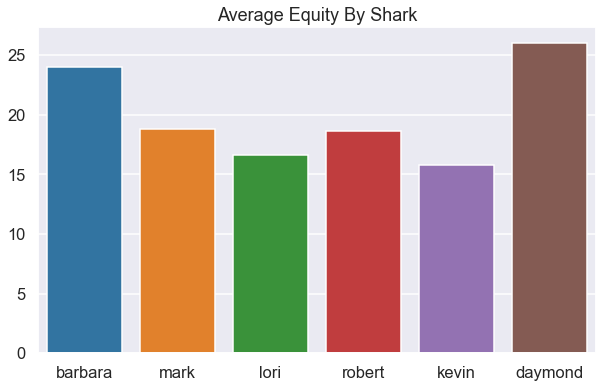

In [67]:
sharks = ['barbara', 'mark', 'lori', 'robert', 'kevin', 'daymond']
means = []
for shark in sharks:
    means.append(df['{}_investment_equity'.format(shark)].mean())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=means)
plt.title('Average Equity By Shark')
plt.show()

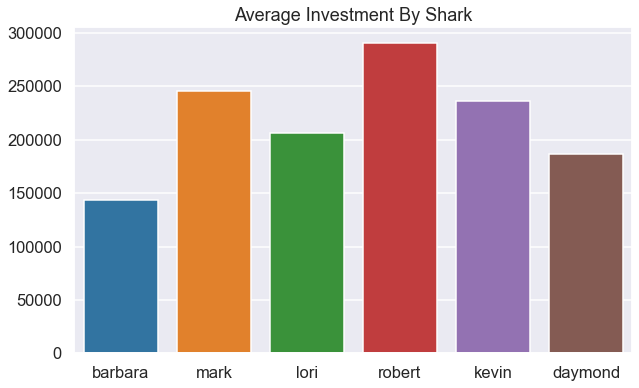

In [68]:
means = []
for shark in sharks:
    means.append(df['{}_investment_amount'.format(shark)].mean())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=means)
plt.title('Average Investment By Shark')
plt.show()

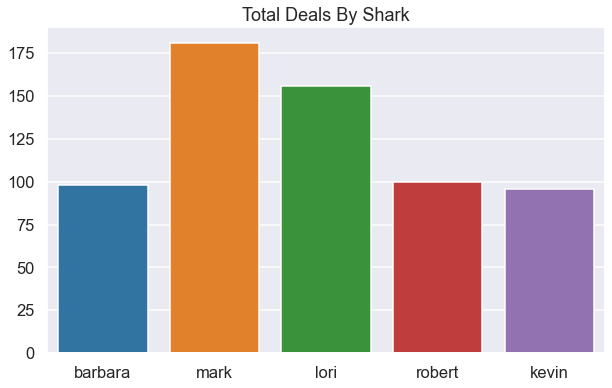

In [58]:
sharks = ['barbara', 'mark', 'lori', 'robert', 'kevin']
counts = []
for shark in sharks:
    counts.append(df['{}_investment_amount'.format(shark)].count())
fig = plt.figure(figsize=(10,6))
sns.barplot(x=sharks, y=counts)
plt.title('Total Deals By Shark')
plt.show()

ConversionError: Failed to convert value(s) to axis units: 0       2009-08-09 00:00:00
1       2009-08-09 00:00:00
6       2009-08-16 00:00:00
11      2009-08-23 00:00:00
16      2009-08-30 00:00:00
               ...         
996               23-Oct-20
1003               6-Nov-20
1019              22-Oct-21
1032    2022-09-23 00:00:00
1035    2022-09-30 00:00:00
Name: x, Length: 98, dtype: object

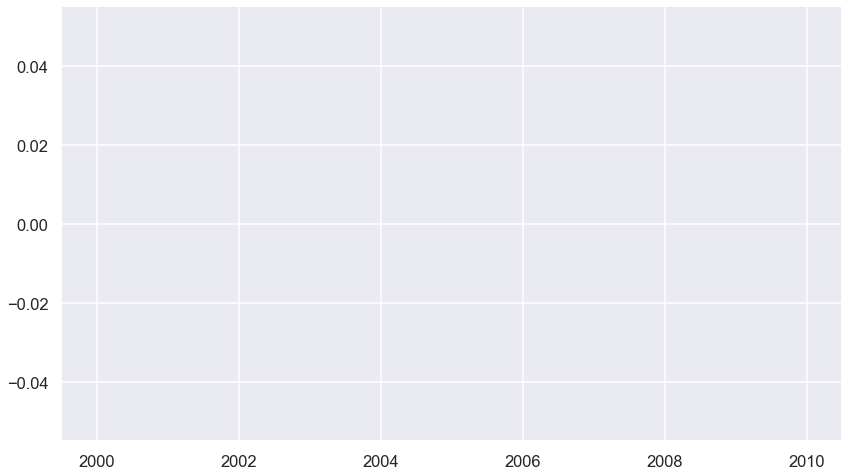

In [59]:
colors = ['blue','orange','green','red','purple']
fig = plt.figure(figsize=(14,8))
for i,shark in enumerate(sharks):
    shark_df = df[df['{}_investment_equity'.format(shark)] > 0]
    y = shark_df['{}_investment_amount'.format(shark)]
    x = shark_df.original_air_date
    sns.lineplot(x=x, y=y, color=colors[i], label=shark)
plt.legend()
plt.show()

In [60]:
equity_averages = []
investment_averages = []
genders = []

for gender in df.pitchers_gender.unique():
    genders.append(gender)
    equity_averages.append(df[df.pitchers_gender == gender].total_deal_equity.mean())
    investment_averages.append(df[df.pitchers_gender == gender].total_deal_amount.mean())

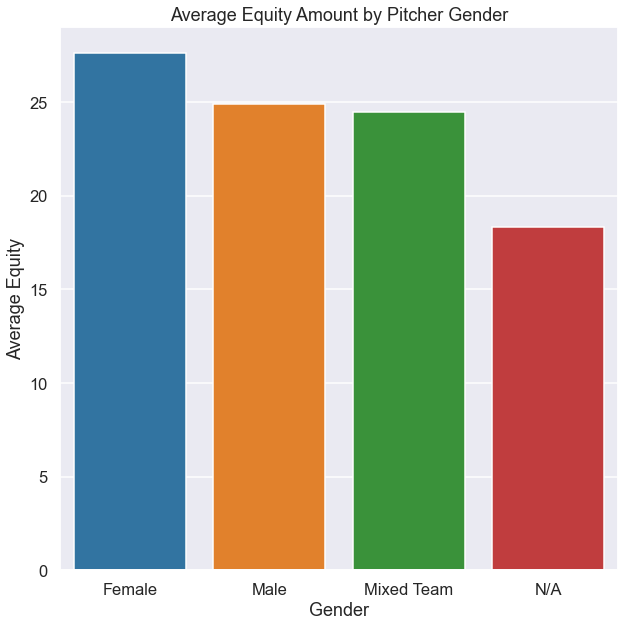

In [61]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=genders, y=equity_averages)
plt.title('Average Equity Amount by Pitcher Gender')
plt.xlabel('Gender')
plt.ylabel('Average Equity')
plt.show()

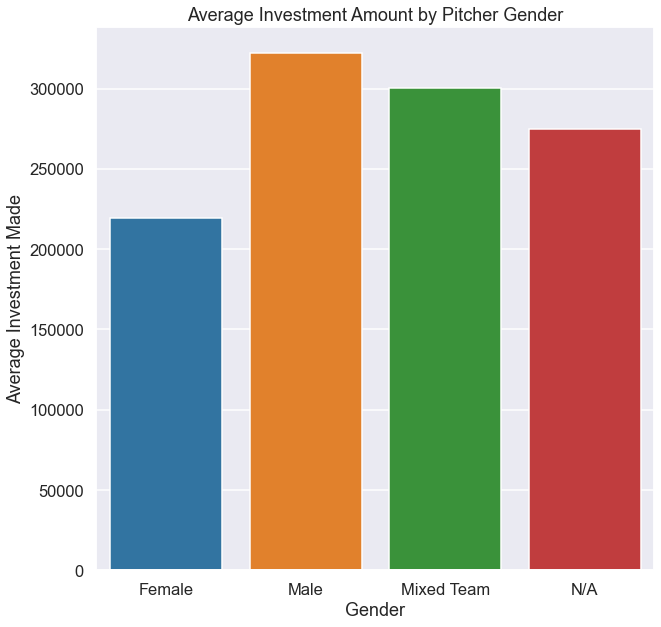

In [62]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=genders, y=investment_averages)
plt.title('Average Investment Amount by Pitcher Gender')
plt.xlabel('Gender')
plt.ylabel('Average Investment Made')
plt.show()

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 0 to 1037
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   season_number                1038 non-null   int64  
 1   season_start                 1038 non-null   object 
 2   season_end                   1038 non-null   object 
 3   episode_number               1038 non-null   int64  
 4   pitch_number                 1038 non-null   int64  
 5   original_air_date            1038 non-null   object 
 6   startup_name                 1038 non-null   object 
 7   industry                     1038 non-null   object 
 8   business_description         1038 non-null   object 
 9   pitchers_gender              1038 non-null   object 
 10  pitchers_city                1038 non-null   object 
 11  pitchers_state               1038 non-null   object 
 12  multiple_entrepreneurs       1038 non-null   float64
 13  original_ask_amoun

In [64]:
sharks

['barbara', 'mark', 'lori', 'robert', 'kevin']

In [69]:
single_shark_deals = df[df.number_of_sharks_in_deal == 1]
single_shark_deals['shark'] = ''
for shark in sharks:
    single_shark_deals.loc[single_shark_deals[f'{shark}_investment_equity'] > 0,'shark'] = shark
single_shark_deals.shark.value_counts()

<ipython-input-69-9eac154e00b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_shark_deals['shark'] = ''
/Users/chrisgrannan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/chrisgrannan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

mark       92
lori       84
barbara    63
daymond    63
robert     57
kevin      51
           36
Name: shark, dtype: int64

In [66]:
len(df[df.guest_investment_amount > 0])

68

In [72]:
grouped

total_deal_amount  total_deal_equity
shark   pitchers_gender                                      
        Female               231000.000000          23.000000
        Male                 248214.285714          24.821429
        Mixed Team           407500.000000          14.383333
barbara Female               137000.000000          33.432000
        Male                 141000.000000          26.876667
        Mixed Team           162500.000000          25.625000
daymond Female               161428.571429          31.285714
        Male                 197034.482759          30.962069
        Mixed Team           337250.000000          33.830000
kevin   Female               370000.000000           8.100000
        Male                 324062.500000          21.589062
        Mixed Team           286153.846154          17.115385
        N/A                  325000.000000          10.000000
lori    Female               221851.851852          23.418519
        Male                 284390.243902          18.885366
        Mixed Team           191250.000000          24.250000
mark    Female               306458.333333          24.750000
        Male                 319727.272727          25.398182
        Mixed Team           377083.333333          22.416667
        N/A                  400000.000000          25.000000
robert  Female               233900.000000          24.630000
        Male                 472845.512195          22.526829
        Mixed Team           219166.666667          22.500000

<ipython-input-77-f8a16ed76880>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = single_shark_deals.groupby(['shark','pitchers_gender'])['total_deal_amount','total_deal_equity'].mean().reset_index()


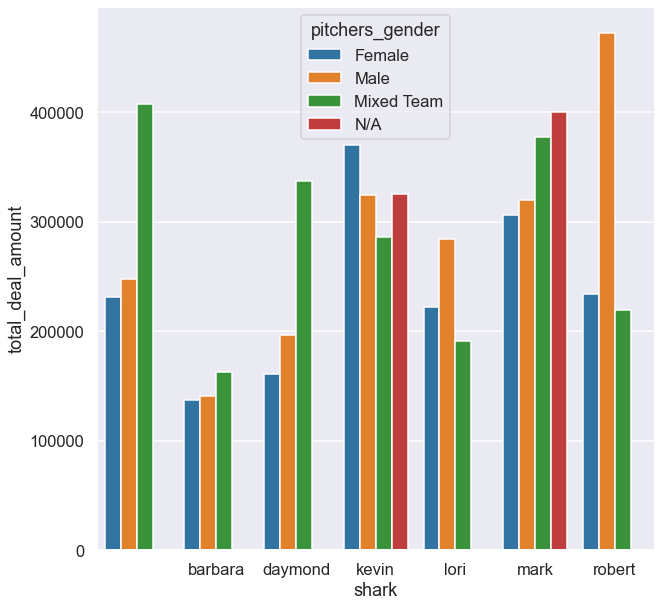

In [77]:
grouped = single_shark_deals.groupby(['shark','pitchers_gender'])['total_deal_amount','total_deal_equity'].mean().reset_index()
fig = plt.figure(figsize=(10,10))
sns.barplot(x='shark', y='total_deal_amount', hue='pitchers_gender', data=grouped)
plt.show()

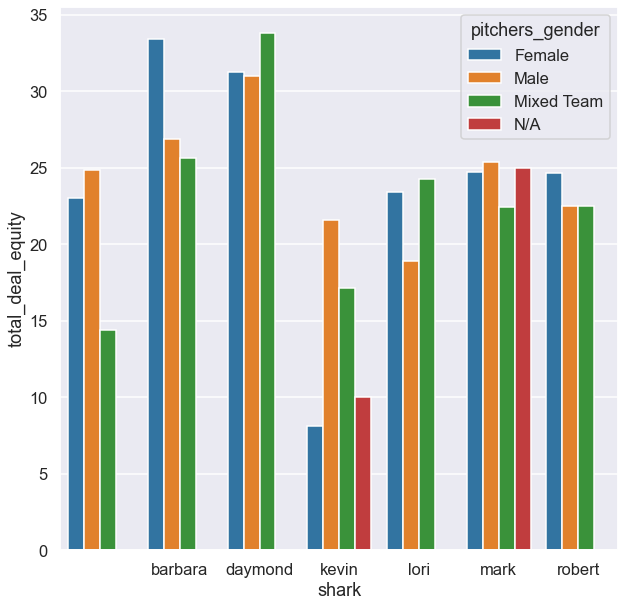

In [79]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x='shark', y='total_deal_equity', hue='pitchers_gender', data=grouped)
plt.show()

<ipython-input-80-f33899509a77>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = single_shark_deals.groupby(['shark','industry'])['total_deal_amount','total_deal_equity'].mean().reset_index()


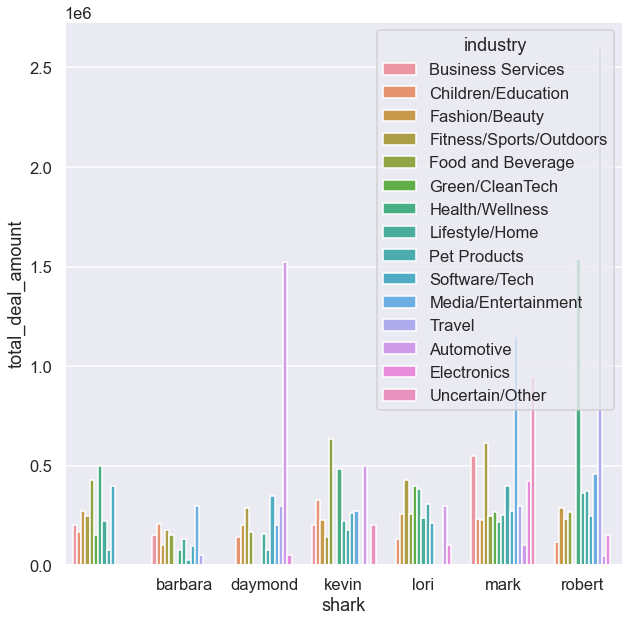

In [80]:
grouped2 = single_shark_deals.groupby(['shark','industry'])['total_deal_amount','total_deal_equity'].mean().reset_index()
fig = plt.figure(figsize=(10,10))
sns.barplot(x='shark', y='total_deal_amount', hue='industry', data=grouped)
plt.show()

<ipython-input-83-c7c9b170be04>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped3 = single_shark_deals.groupby(['shark','industry','pitchers_gender'])['total_deal_amount','total_deal_equity'].count().reset_index()


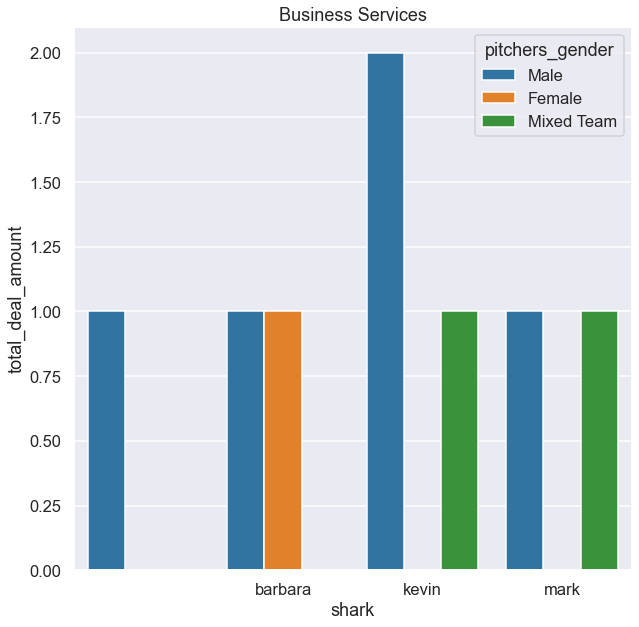

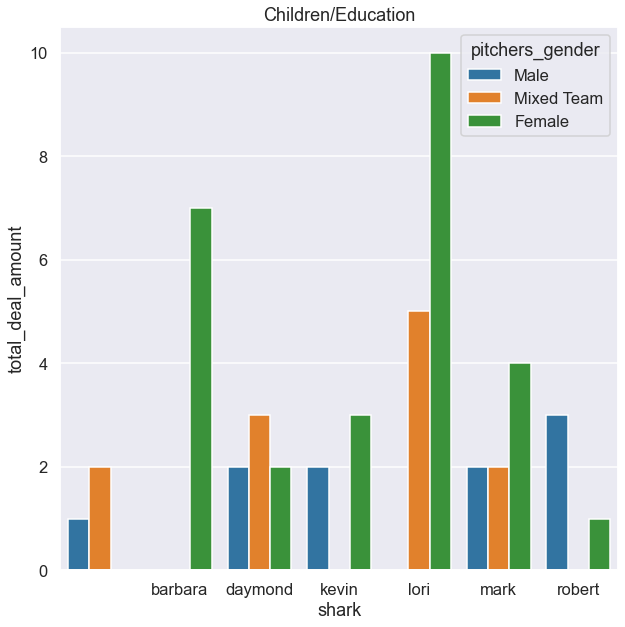

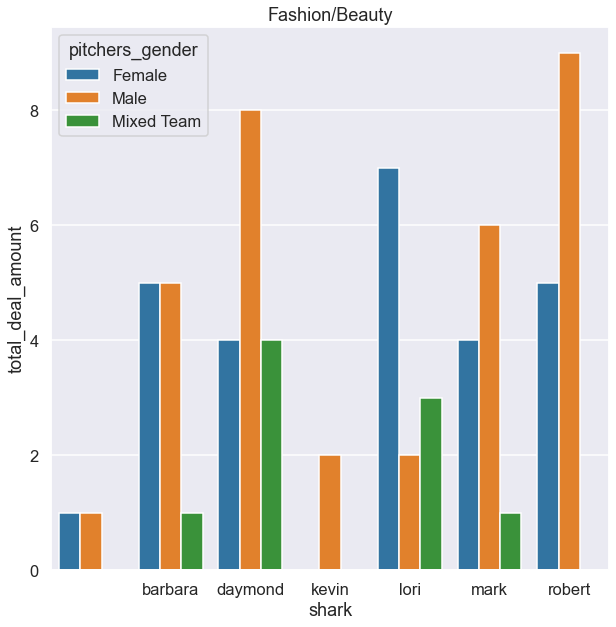

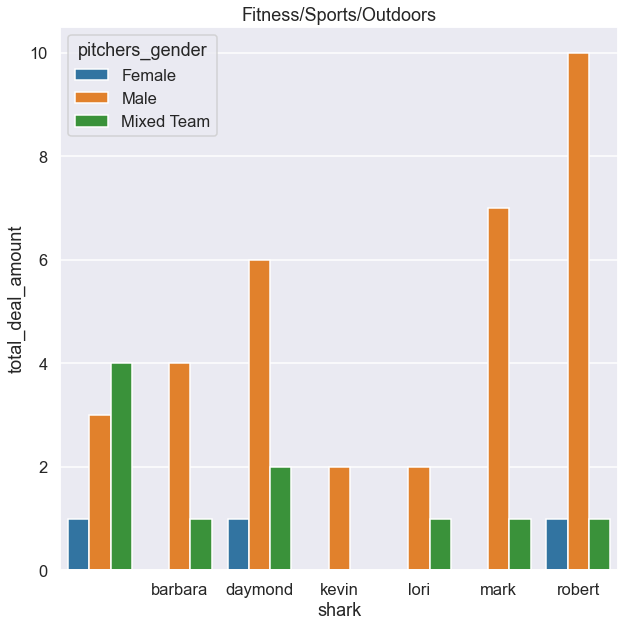

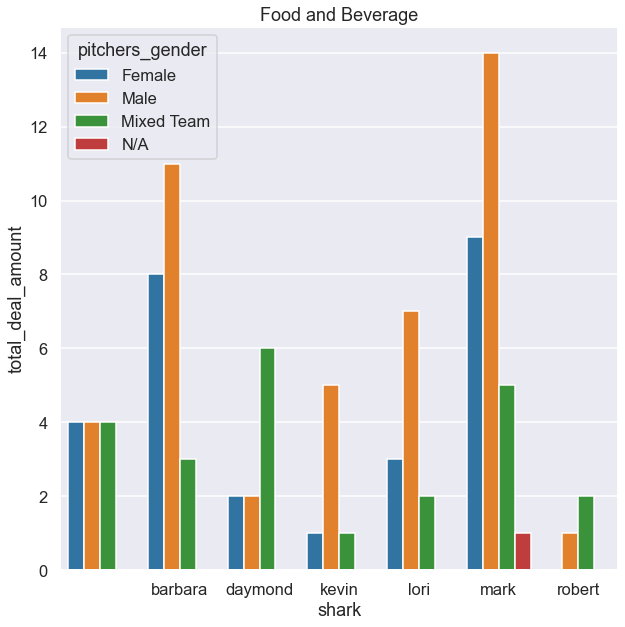

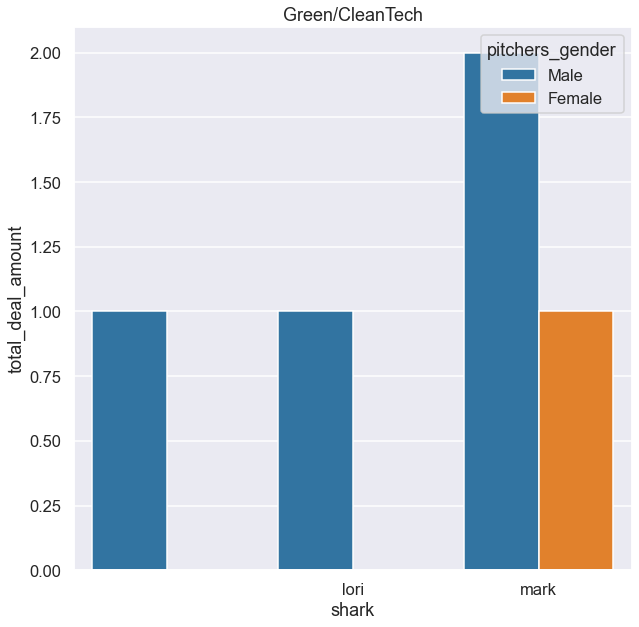

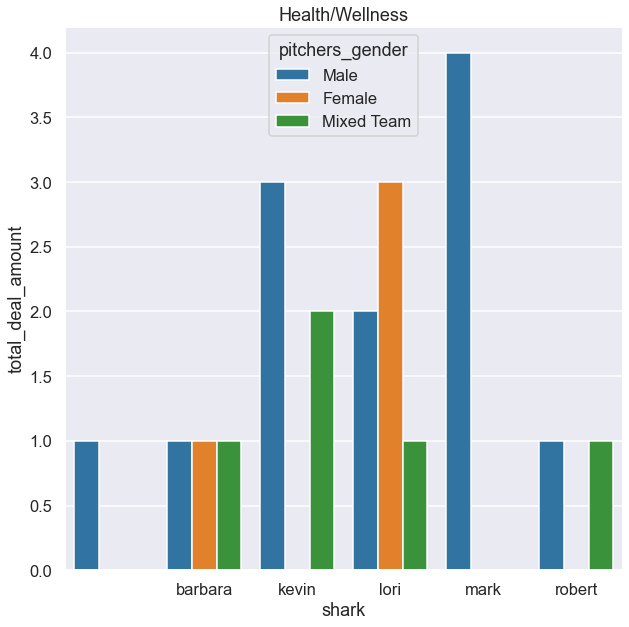

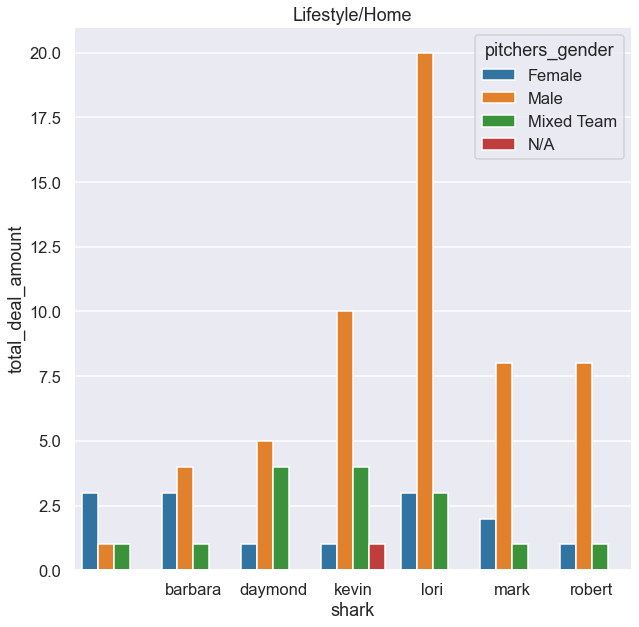

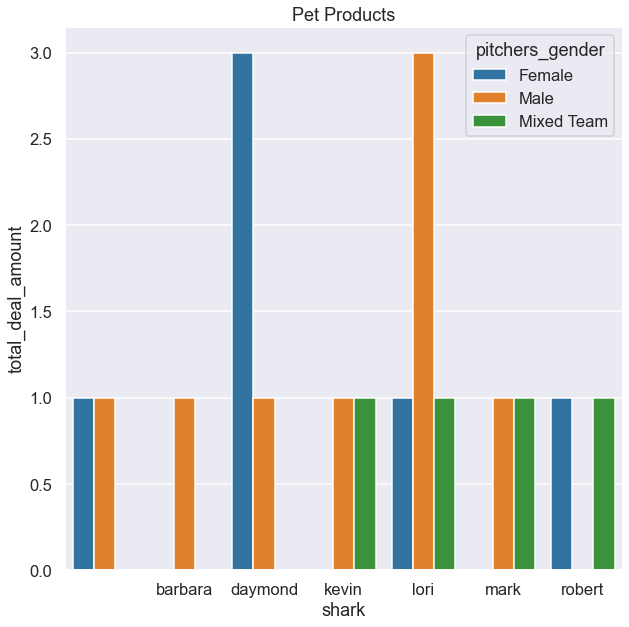

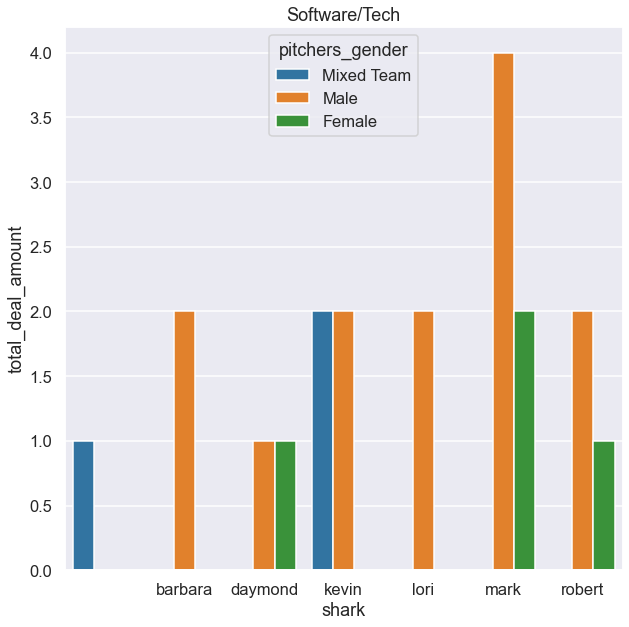

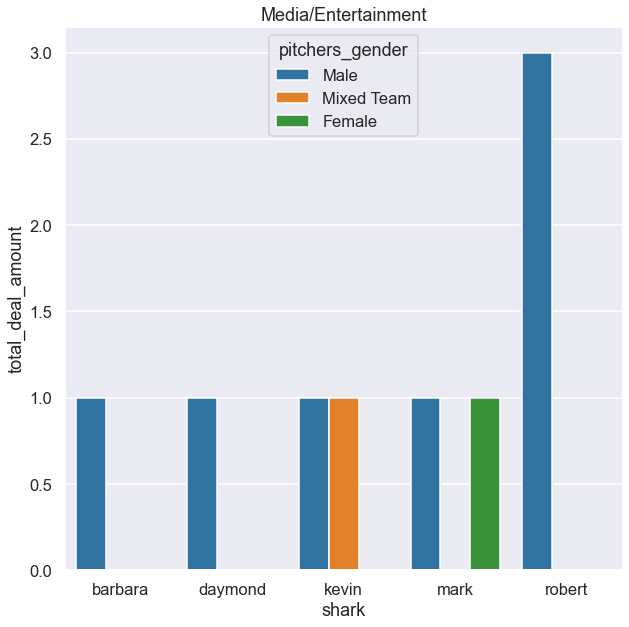

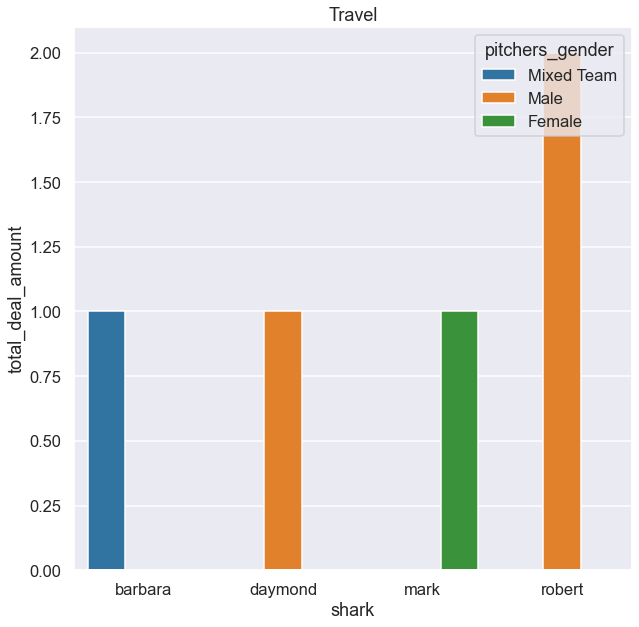

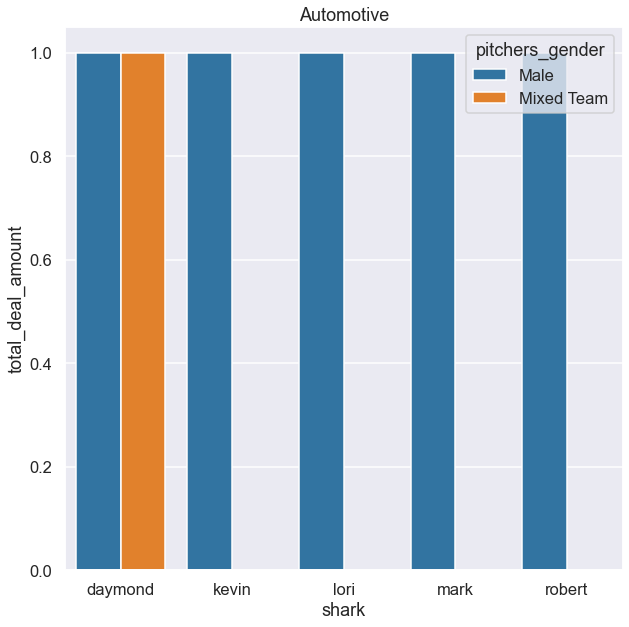

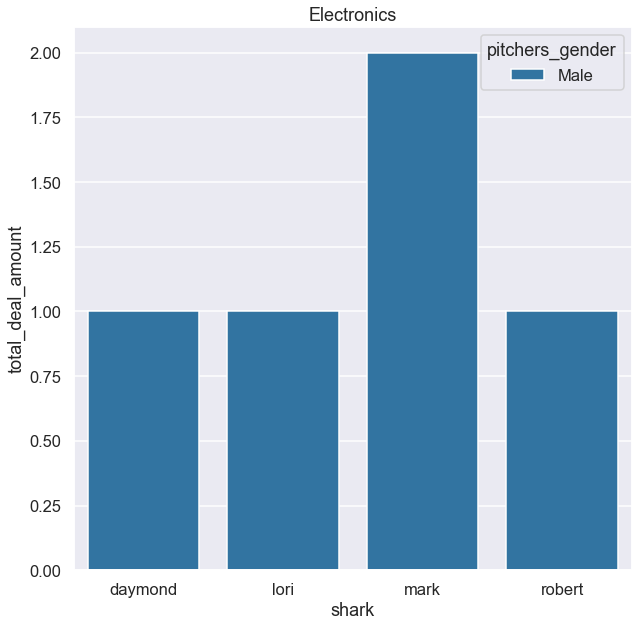

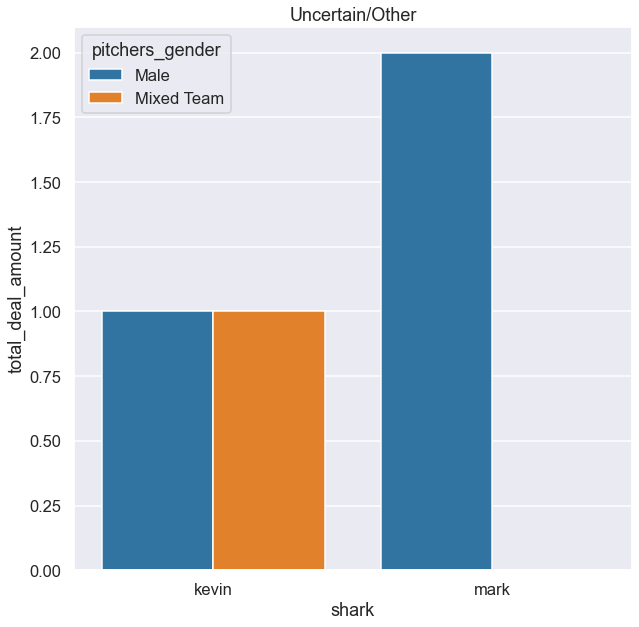

In [83]:
grouped3 = single_shark_deals.groupby(['shark','industry','pitchers_gender'])['total_deal_amount','total_deal_equity'].mean().reset_index()
for industry in grouped3.industry.unique():
    fig = plt.figure(figsize=(10,10))
    sns.barplot(x='shark', y='total_deal_amount', hue='pitchers_gender', data=grouped3[grouped3.industry == industry])
    plt.title(industry)
    plt.show()